In [3]:
import ode_solvers as sol
import numpy as np
import matplotlib.pyplot as plt
import plot as put

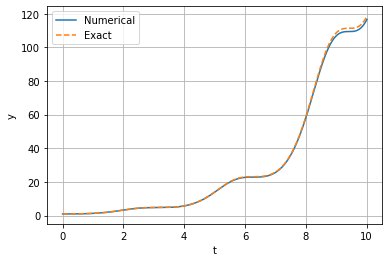

(1002,)


In [2]:
"""
Test the euler solver code via plotting
"""

def f(t,x):
    return x*np.sin(t)*np.sin(t)

t, x_solver = sol.solve(f, 0, 1, 10, .01, method = "euler")

x_real = np.exp(.5*(t - .5*np.sin(2*t)))

put.plot_solution(t,x_solver, x_real)
print(t.shape)

(102,)


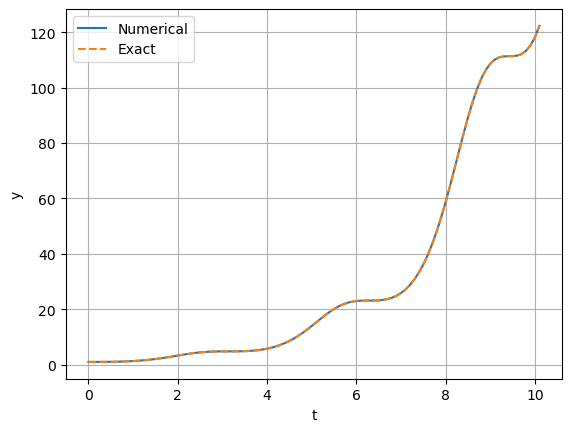

In [3]:
"""
Test the rk4 solver code via plotting
"""

def f(t,x):
    return x*np.sin(t)*np.sin(t)

t, x_solver = sol.solve(f, 0, 1, 10, .1, method = "rk4")
print(t.shape)

x_real = np.exp(.5*(t - .5*np.sin(2*t)))

put.plot_solution(t,x_solver, x_real)

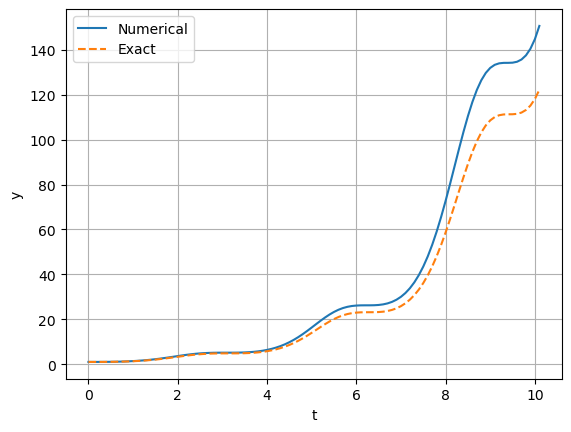

In [3]:
"""
Test the backward_euler solver code via plotting
"""

def f(t,x):
    return x*np.sin(t)*np.sin(t)

t, x_solver = sol.solve(f, 0, 1, 10, .1, method = "backward_euler")

x_real = np.exp(.5*(t - .5*np.sin(2*t)))

put.plot_solution(t,x_solver, x_real)

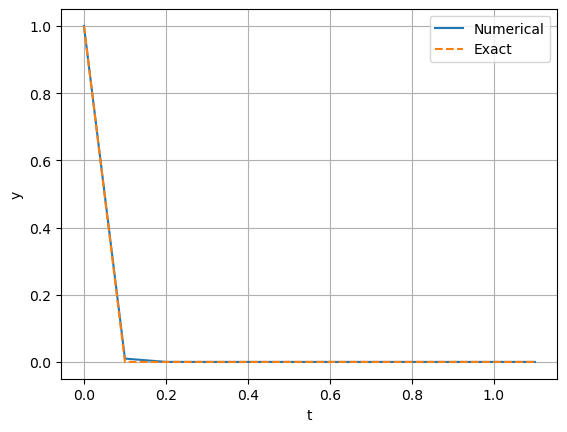

In [5]:
"""
Test the backward_euler solver code via plotting
"""

def f(t,x):
    return -1000*x

t, x_solver = sol.solve(f, 0, 1, 1, .1, method = "backward_euler")

x_real = np.exp(-1000*t)

put.plot_solution(t,x_solver, x_real)

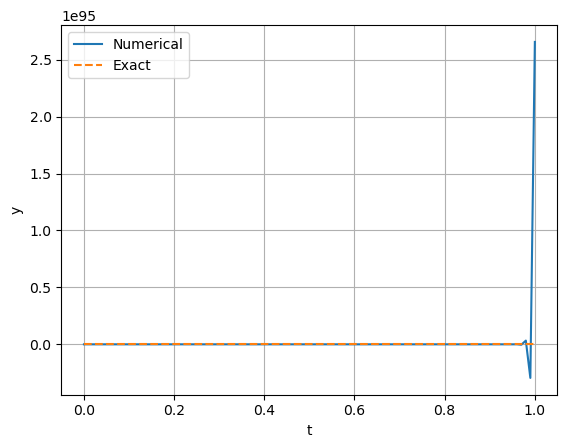

2.6561398887587552e+95


In [6]:
"""
Test the euler solver code via plotting; this is stiff and should not work
"""

def f(t,x):
    return -1000*x

t, x_solver = sol.solve(f, 0, 1, 1, .01, method = "euler")

x_real = np.exp(-1000*t)

put.plot_solution(t,x_solver, x_real)
print(x_solver[-1])

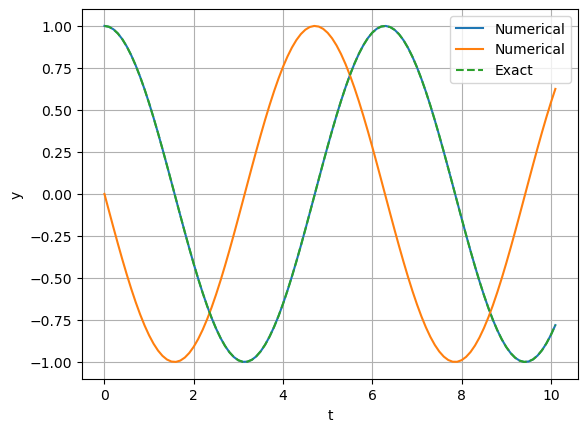

In [9]:
"""
Test the solvers code via plotting; second order
"""

def f(t,x):
    return np.array([x[1], -x[0]])

t, x_solver = sol.solve(f, 0, [1,0], 10, .1, method = "rk4")

x_real = np.cos(t)

put.plot_solution(t,x_solver, x_real)

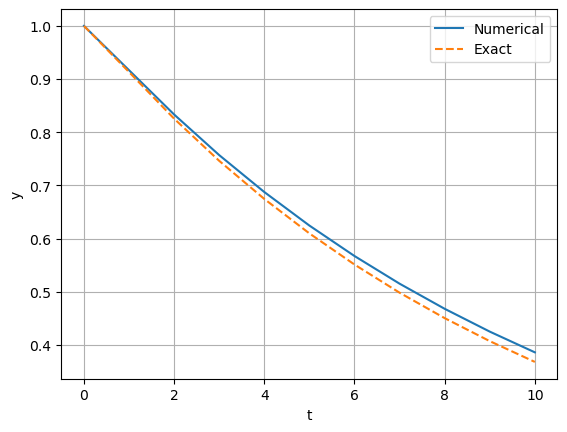

(11, 2)


In [23]:
"""
Test the solvers code via plotting; second order; stiff
"""
l = 10

def f(t,x):
    return np.array([x[1], -l * x[1] - x[0]])

t, x_solver = sol.solve(f, 0, [1,0], 10, 1, method = "backward_euler")

def x_exact(t):
    r1 = (-l + np.sqrt(l**2 - 4)) / 2
    r2 = (-l - np.sqrt(l**2 - 4)) / 2
    C1 = -r2 / (r1 - r2)
    C2 = 1 - C1
    return C1 * np.exp(r1 * t) + C2 * np.exp(r2 * t)

x_real = x_exact(t)

put.plot_solution(t,x_solver[:,0], x_real)
print(x_solver.shape)

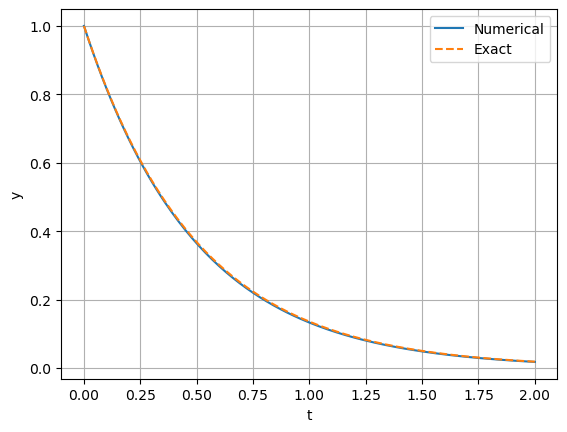

(201,)


In [24]:
"""
Test the solvers code via plotting; exp decay
"""

def f(t,x):
    return -2*x

t, x_solver = sol.solve(f, 0, 1, 2, .01, method = "euler")

x_real = np.exp(-2*t)

put.plot_solution(t,x_solver, x_real)

In [27]:
print(x_real[-1])

0.01831563888873413
